In [45]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [46]:
img=cv2.imread('./test_images/test1.jfif')
img.shape

(183, 275, 3)

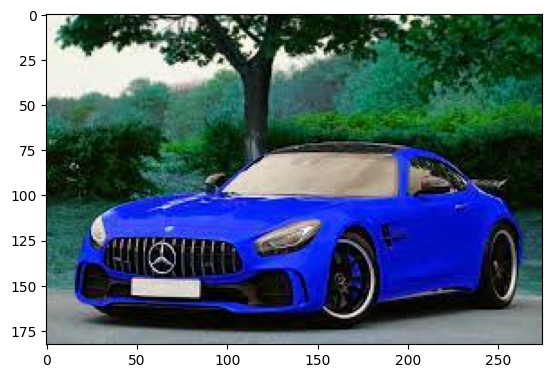

In [47]:
plt.imshow(img)

In [48]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(183, 275)

In [49]:
gray

array([[238, 238, 238, ...,  61,  43,  65],
       [238, 238, 238, ...,  58,  43,  61],
       [238, 238, 238, ...,  30,  21,  33],
       ...,
       [147, 147, 149, ..., 146, 146, 146],
       [143, 145, 148, ..., 145, 145, 145],
       [140, 143, 147, ..., 144, 144, 144]], dtype=uint8)

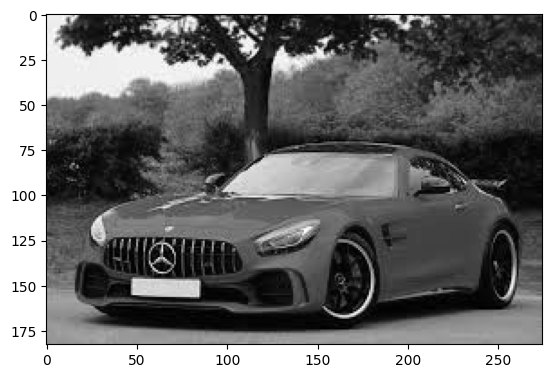

In [50]:
plt.imshow(gray, cmap='gray')

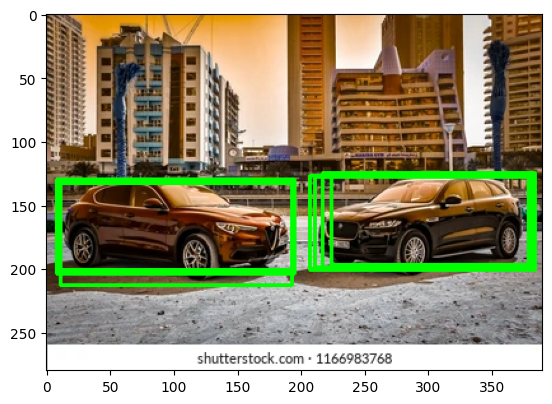

In [73]:
net = cv2.dnn.readNet("openCV/yolov3.weights", "openCV/yolov3.cfg")
classes = ['car']

image = cv2.imread("./test_images/test12.jfif")

height, width, _ = image.shape
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(net.getUnconnectedOutLayersNames())


for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.9 :
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            car_crop = image[y:y + h, x:x + w]

plt.imshow(image)

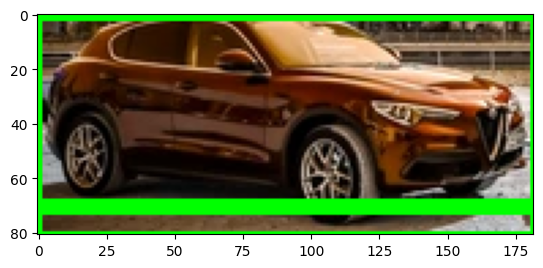

In [74]:
plt.imshow( car_crop)

In [75]:
def get_cropped_car_image(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    height, width, _ = img.shape
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(net.getUnconnectedOutLayersNames())
    max_area=1000 #min 1000 pixles in area
    flag=1
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.1 :
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                area=w*h;
                if area>max_area:
                    max_area=area
                    car_crop = img[y:y + h, x:x + w]
                    flag=0

    if flag==1:
        error=cv2.imread("./test_images/error.jfif")
        car_crop=error
        
    return car_crop

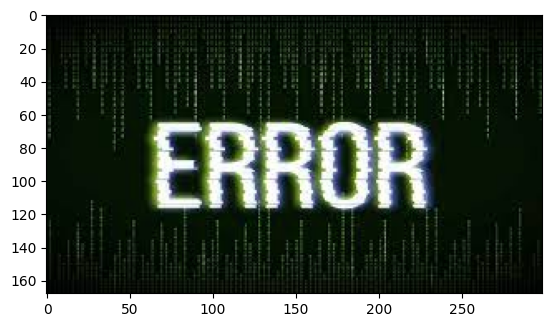

In [76]:
cropped_img=get_cropped_car_image('./test_images/test11.jfif')
plt.imshow(cropped_img)

In [77]:
import os
path_to_data="./dataset/"
path_to_cropped_data="./dataset/cropped"
img_dirs=[]

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./dataset/convertible',
 './dataset/coupe',
 './dataset/cropped',
 './dataset/croppedconvertible',
 './dataset/hatchback',
 './dataset/miniVan',
 './dataset/mini_micro',
 './dataset/pickup',
 './dataset/roadster',
 './dataset/sedan',
 './dataset/sports',
 './dataset/stationWagon',
 './dataset/suv']

In [80]:
if not os.path.exists(path_to_cropped_data):
    os.mkdir(path_to_cropped_data)
cropped_img_dirs=[]
car_model_file_names_dict={}
for img_dir in img_dirs:
    count=1
    car_model=img_dir.split('/')[-1]
    car_model_file_names_dict[car_model]=[]
    for entry in os.scandir(img_dir):
        cropped_image=get_cropped_car_image(entry.path)
        if cropped_image is not None:
            cropped_folder = path_to_cropped_data + car_model
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                
            cropped_file_name = car_model +str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            if cv2.imwrite(cropped_file_path, cropped_image):
                car_model_file_names_dict[car_model].append(cropped_file_path)
                count += 1
            else:
                print(f"Failed to save image: {cropped_file_path}")

error: OpenCV(4.8.1) /io/opencv/modules/imgcodecs/src/loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'
